### EDA Analysis of HPZ-competition-Land Cover Data


# Abstract:
>- This Land cover data set is based on Data Source gathered from https://www.fao.org/faostat/en/#data/LC.
> 
>- Data of 244 Countries was selected.
> 
> **Description of Columns:**
> 
| Column Name     | Column Description   | 
| :-------------- | :------------------- |
  |  Domain         |  Land Cover          |
  |Area      | the country name | 
  |Element|MODIS land cover types based on the Land Cover Classification System|
  |Item|Artificial surfaces (including urban and associated areas)', 'Herbaceous crops', 'Woody crops', 'Multiple or layered crops', 'Grassland', 'Tree-covered areas', 'Mangroves', 'Shrub-covered areas', 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded', 'Sparsely natural vegetated areas', 'Terrestrial barren land', 'Permanent snow and glaciers', 'Inland water bodies', 'Coastal water bodies and intertidal areas'|
  |Year|2001 to 2018|
  |Unit| 1000 ha|
  |Value|Hactres of covered land|
  |Flag Description|"Calculated Data", "Data not available" and "Aggregate, may include official, semi-official, estimated or calculated data"|
 

# **Data Peprocessing**

#### **Step 1: Import Libraries and Check the data shape**

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [78]:
# Open file
df=pd.read_csv('land_cover_data_11-30-2021.csv')
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2001,2001,1000 ha,88.1603,FC,Calculated data
1,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2002,2002,1000 ha,88.1818,FC,Calculated data
2,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2003,2003,1000 ha,88.2247,FC,Calculated data
3,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2004,2004,1000 ha,88.2462,FC,Calculated data
4,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2005,2005,1000 ha,88.3106,FC,Calculated data


In [79]:
#find shape
rows,columns=df.shape
print("number of columns: ",columns)    
print("number of rows: ",rows)

number of columns:  14
number of rows:  60760


#### **Step 2: Check the Data Strucutre of each Column** 

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60760 entries, 0 to 60759
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       60760 non-null  object 
 1   Domain            60760 non-null  object 
 2   Area Code (ISO3)  60760 non-null  object 
 3   Area              60760 non-null  object 
 4   Element Code      60760 non-null  int64  
 5   Element           60760 non-null  object 
 6   Item Code         60760 non-null  int64  
 7   Item              60760 non-null  object 
 8   Year Code         60760 non-null  int64  
 9   Year              60760 non-null  int64  
 10  Unit              60760 non-null  object 
 11  Value             43400 non-null  float64
 12  Flag              60760 non-null  object 
 13  Flag Description  60760 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 6.5+ MB


#### **Step 3: Deal With Missing Values**

In [81]:
#check missing values
df.isnull().sum()

Domain Code             0
Domain                  0
Area Code (ISO3)        0
Area                    0
Element Code            0
Element                 0
Item Code               0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value               17360
Flag                    0
Flag Description        0
dtype: int64

In [82]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

Domain Code          0.000000
Domain               0.000000
Area Code (ISO3)     0.000000
Area                 0.000000
Element Code         0.000000
Element              0.000000
Item Code            0.000000
Item                 0.000000
Year Code            0.000000
Year                 0.000000
Unit                 0.000000
Value               28.571429
Flag                 0.000000
Flag Description     0.000000
dtype: float64

> **Information obtained from step 3**
> - No Column has missing values except Value column
>   
> - Missing values in Value column account for 28%
> 
> - Now we are going to remove na values

##### **Step 3(b) Removing Na values**

In [83]:
# Deal with missing values-Dropping not available data
# df_new.drop(df_new.index[df_new['Flag'] == 'NV'], inplace=True)
#df.dropna(inplace=True)
df = df[df["Flag Description"] != "Data not available"]
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 43472 entries, 0 to 60741
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       43472 non-null  object 
 1   Domain            43472 non-null  object 
 2   Area Code (ISO3)  43472 non-null  object 
 3   Area              43472 non-null  object 
 4   Element Code      43472 non-null  int64  
 5   Element           43472 non-null  object 
 6   Item Code         43472 non-null  int64  
 7   Item              43472 non-null  object 
 8   Year Code         43472 non-null  int64  
 9   Year              43472 non-null  int64  
 10  Unit              43472 non-null  object 
 11  Value             43400 non-null  float64
 12  Flag              43472 non-null  object 
 13  Flag Description  43472 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 5.0+ MB


In [84]:
df["Value"] = df.groupby('Area')['Value'].transform(lambda x: x.fillna(x.mean()))

In [85]:
#percentage of missing values
df.isnull().sum()/df.shape[0]*100

Domain Code         0.0
Domain              0.0
Area Code (ISO3)    0.0
Area                0.0
Element Code        0.0
Element             0.0
Item Code           0.0
Item                0.0
Year Code           0.0
Year                0.0
Unit                0.0
Value               0.0
Flag                0.0
Flag Description    0.0
dtype: float64

> **Information obtained from step 3(b)**
> - No Column has missing values Now
>   
> - Now we are going to get the summary of data

### **Step 4:Make new Column of Continent**

In [86]:
#Adding a new column of Continent 
#pip install pycountry_convert
# # #Making new columns of Continent for Visualization

import pycountry_convert as pc
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
# Example
# country_name = 'Chagos Archipelago'
# print(country_to_continent(country_name))
continent=[]
for i in df['Area']:
    
   if i=='Chagos Archipelago':
       continent.append('Africa')
       
   elif i=='Western Sahara':
       continent.append('Africa')
   elif i=='Channel Islands'  :
       continent.append('Europe')
   elif i=='China, Hong Kong SAR'  :
       continent.append('Asia')
   elif i=='China, Macao SAR'  :
       continent.append('Asia')
   elif i=='China, mainland'  :
       continent.append('Asia')
   elif i=='China, Taiwan Province of'  :
       continent.append('Asia')
   elif i=='French Guyana'  :
       continent.append('South America')
   elif i=='French Southern Territories'  :
       continent.append('Antarctica')
   elif i=='Heard and McDonald Islands'  :
       continent.append('Antarctica')
   elif i=='Holy See'  :
       continent.append('Europe')
   elif i=='Iran (Islamic Republic of)'  :
       continent.append('Europe')
   elif i=='Johnston Island'  :
       continent.append('Oceania')
   elif i=='Micronesia (Federated States of)'  :
       continent.append('Oceania')
   elif i=='Midway Island'  :
       continent.append('North America')
   elif i=='Netherlands Antilles (former)'  :
       continent.append('Europe')
   elif i=='Pitcairn'  :
       continent.append('Oceania')
   elif i=='Wake Island'  :
       continent.append('Oceania')
   elif i=='Wallis and Futuna Islands'  :
       continent.append('Oceania')
   elif i=='Republic of Korea'  :
       continent.append('Asia')
   elif i=='Serbia and Montenegro'  :
       continent.append('Europe')
   elif i=='Sudan (former)'  :
       continent.append('Asia')
   elif i=='Timor-Leste'  :
       continent.append('Asia')
   elif i=='Venezuela (Bolivarian Republic of)'  :
       continent.append('South America')
   elif i=='Antarctica' :
       continent.append('Antarctica')
   elif i=='Bolivia (Plurinational State of)' :
       continent.append('South America')
   else:
      continent.append(country_to_continent(i))

df["continent"]=continent


### **Step-5:Summary of Data**

In [87]:
df.describe()

,Element Code,Item Code,Year Code,Year,Value
count,43472.0,43472.000000,43472.000000,43472.000000,43472.000000
mean,5007.0,6976.599420,2009.517252,2009.517252,6532.205080
std,0.0,4.029949,5.187286,5.187286,40830.968070
min,5007.0,6970.000000,2001.000000,2001.000000,0.000000
25%,5007.0,6974.000000,2005.000000,2005.000000,0.000000
50%,5007.0,6976.500000,2010.000000,2010.000000,13.233700
75%,5007.0,6980.000000,2014.000000,2014.000000,475.302625
max,5007.0,6983.000000,2018.000000,2018.000000,982529.432800


### **Step-6:Value Counts**

In [88]:
#get unique values count for each column
c=list(df.columns.values)
for i in c:
  print( i,":", df[ i ].nunique())


Domain Code : 1
Domain : 1
Area Code (ISO3) : 244
Area : 244
Element Code : 1
Element : 1
Item Code : 14
Item : 14
Year Code : 18
Year : 18
Unit : 1
Value : 18961
Flag : 2
Flag Description : 2
continent : 7


In [89]:
#checking the number of values in columns 
df.value_counts()

Domain Code  Domain      Area Code (ISO3)  Area            Element Code  Element          Item Code  Item                                                               Year Code  Year  Unit     Value       Flag  Flag Description  continent
LC           Land Cover  206               Sudan (former)  5007          Area from MODIS  6970       Artificial surfaces (including urban and associated areas)         2001       2001  1000 ha  295.3703    FC    Calculated data   Asia         1
                         NIU               Niue            5007          Area from MODIS  6975       Mangroves                                                          2010       2010  1000 ha  0.0000      FC    Calculated data   Oceania      1
                                                                                                                                                                        2002       2002  1000 ha  0.0000      FC    Calculated data   Oceania      1
                         

In [90]:
df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,continent
0,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2001,2001,1000 ha,88.1603,FC,Calculated data,Asia
1,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2002,2002,1000 ha,88.1818,FC,Calculated data,Asia
2,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2003,2003,1000 ha,88.2247,FC,Calculated data,Asia
3,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2004,2004,1000 ha,88.2462,FC,Calculated data,Asia
4,LC,Land Cover,AFG,Afghanistan,5007,Area from MODIS,6970,Artificial surfaces (including urban and assoc...,2005,2005,1000 ha,88.3106,FC,Calculated data,Asia


### **Step-7: Feature Selection**

In [91]:
#create a new data frame with selected columns
# Domain code,Domain,element code,element, unit are left because have only 1 value
df=df[['Area Code (ISO3)','Area','Item Code','Item','Year','Value','continent']]

In [92]:
df['continent'].value_counts()

Africa           10420
Asia              9342
Europe            8950
North America     6660
Oceania           4860
South America     2700
Antarctica         540
Name: continent, dtype: int64

In [93]:
#Create dataframe based on continents
df_a=df.loc[df['continent']=='Asia']
df_e=df.loc[df['continent']=='Europe']
df_an=df.loc[df['continent']=='Antarctica']
df_aus=df.loc[df['continent']=='Australia']
df_o=df.loc[df['continent']=='Oceania']
df_s=df.loc[df['continent']=='South America']
df_an=df.loc[df['continent']=='North America']

In [94]:
df['Item'].value_counts()

Artificial surfaces (including urban and associated areas)           4340
Herbaceous crops                                                     4340
Grassland                                                            4340
Tree-covered areas                                                   4340
Mangroves                                                            4340
Shrub-covered areas                                                  4340
Shrubs and/or herbaceous vegetation, aquatic or regularly flooded    4340
Terrestrial barren land                                              4340
Permanent snow and glaciers                                          4340
Inland water bodies                                                  4340
Woody crops                                                            18
Multiple or layered crops                                              18
Sparsely natural vegetated areas                                       18
Coastal water bodies and intertidal ar

In [95]:
#create dataframebased on item
Artif=df.loc[df['Item']== 'Artificial surfaces (including urban and associated areas)' ]
Grass=df.loc[df['Item']== 'Grassland']
Tree=df.loc[df['Item']== 'Tree-covered areas']
shrub=df.loc[df['Item']== 'Shrub-covered areas']
flooded=df.loc[df['Item']== 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded']
terrestrial=df.loc[df['Item']== 'Terrestrial barren land']
snow=df.loc[df['Item']== 'Permanent snow and glaciers']
inland=df.loc[df['Item']== 'Inland water bodies']

### **Step-8: Distribution of Data**

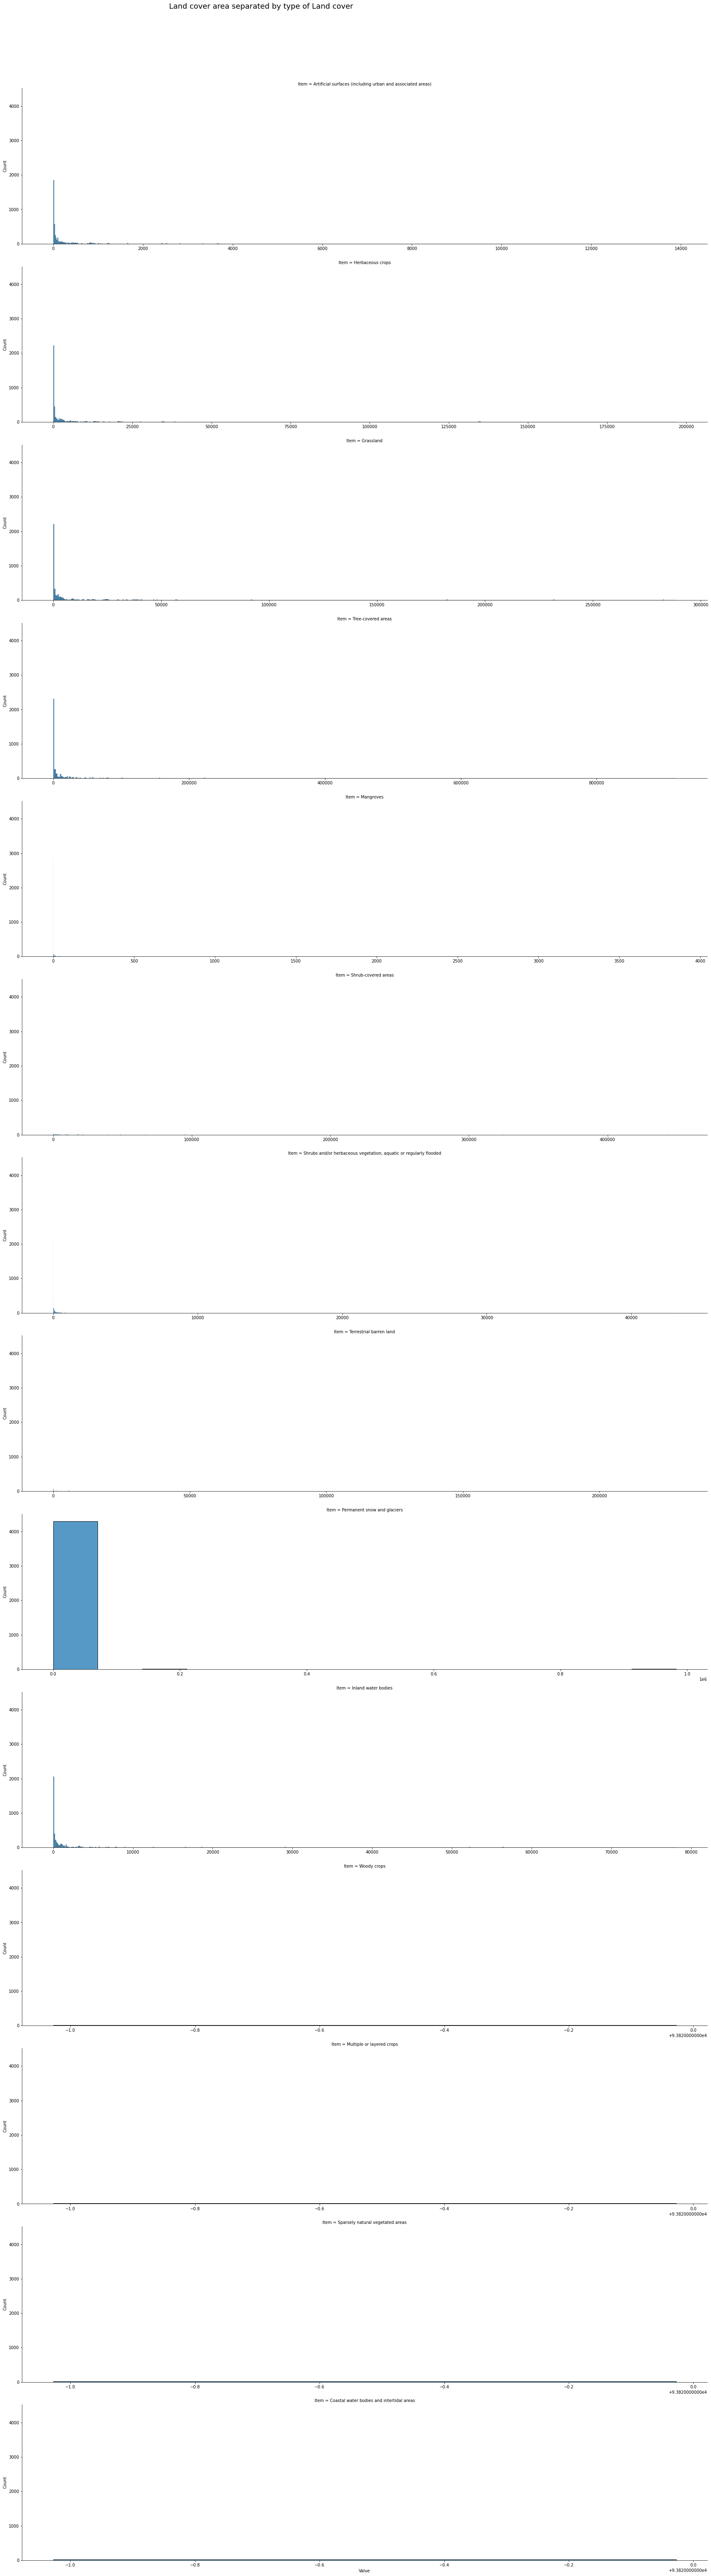

In [96]:
# Data Distribution by Type of land cover
g= sns.FacetGrid(data = df, col = "Item", col_wrap = 1,margin_titles= False, height = 6,aspect = 4,  sharex=False)
g.map(sns.histplot, "Value",)

#customisation
g.fig.suptitle('Land cover area separated by type of Land cover ',fontsize = 18, horizontalalignment='right', y = 1.03)
plt.show()


> Data is right skewed for every type of Land Cover

# Data Visualization

# Overall World Data Visualization

In [97]:
# Visualization of Land covered area through map
import plotly.graph_objects as go
# Create the layout of the chart
title = '<b>World Land Covered Areas</b>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig2 = go.Figure(layout = layout2)


# Create the Choropleth map tracing
trace2 = go.Choropleth(
    locations = df['Area Code (ISO3)'],
    z = df['Value'],
    text = df['Area'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Landcover',
)

fig2.add_trace(trace2)
fig2.show()

In [115]:
# Visualization of Tree covered area through map
import plotly.graph_objects as go
# Create the layout of the chart
title = '<b>World Tree Covered Areas</b>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig2 = go.Figure(layout = layout2)


# Create the Choropleth map tracing
trace2 = go.Choropleth(
    locations = Tree['Area Code (ISO3)'],
    z = Tree['Value'],
    text = Tree['Area'],
    colorscale = 'Viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = 'Landcover',
)

fig2.add_trace(trace2)
fig2.show()

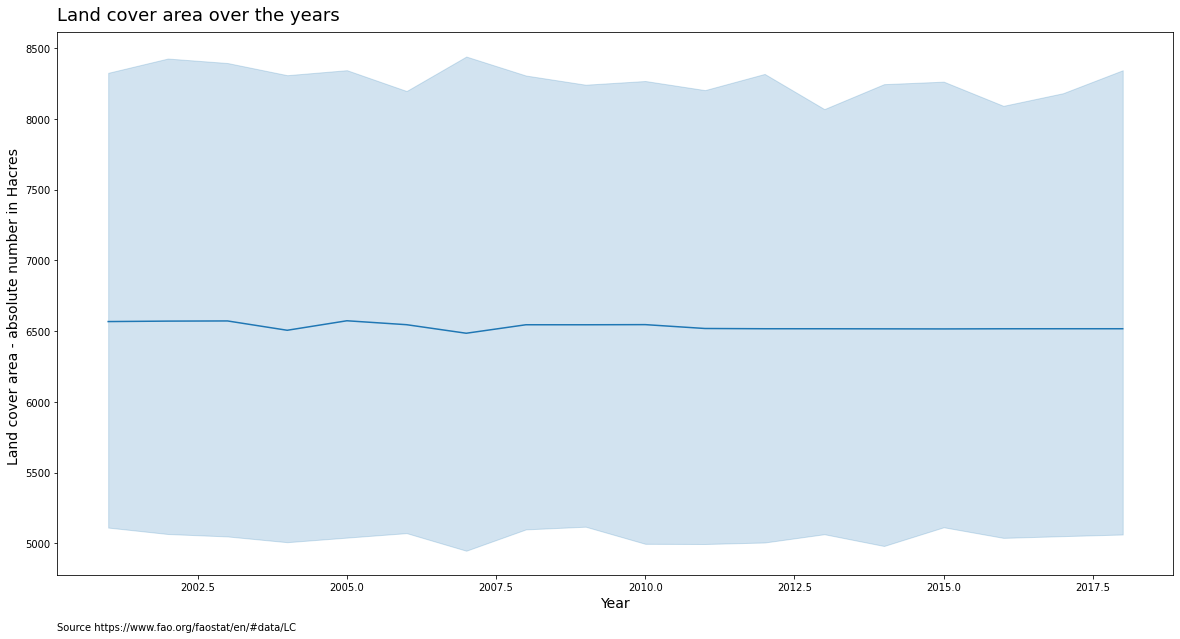

In [99]:
# visualization of Land cover the years
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df)

#customisation
plt.annotate('Source https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
plt.title("Land cover area over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land cover area - absolute number in Hacres ", fontsize=14)

plt.show()

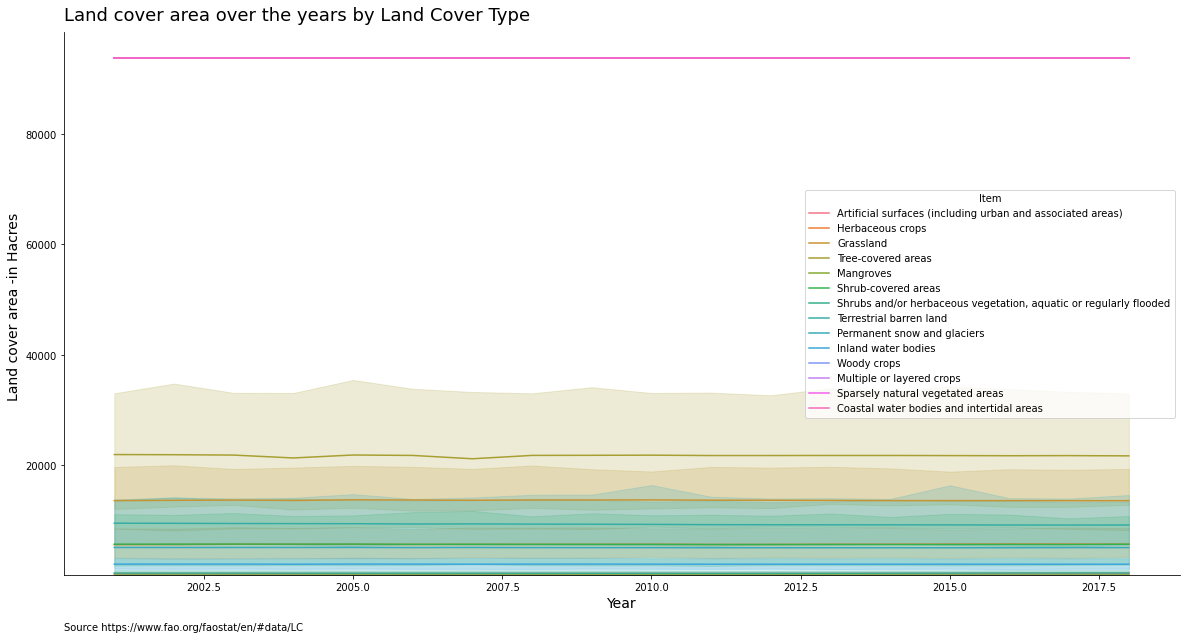

In [100]:
# visualization of Land cover the years by type of Land Cover
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df,hue="Item")

#customisation
plt.annotate('Source https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
plt.ylim(10,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Land cover area over the years by Land Cover Type", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land cover area -in Hacres ", fontsize=14)

plt.show()

**Deep Insight into Data**
> We will try to answer the following questions:

### Q1:Top 10 Countries in world with maximum Tree covered Area

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United States of America'),
  Text(4, 0, 'China'),
  Text(5, 0, 'China, mainland'),
  Text(6, 0, 'Democratic Republic of the Congo'),
  Text(7, 0, 'Indonesia'),
  Text(8, 0, 'Colombia'),
  Text(9, 0, 'Australia')])

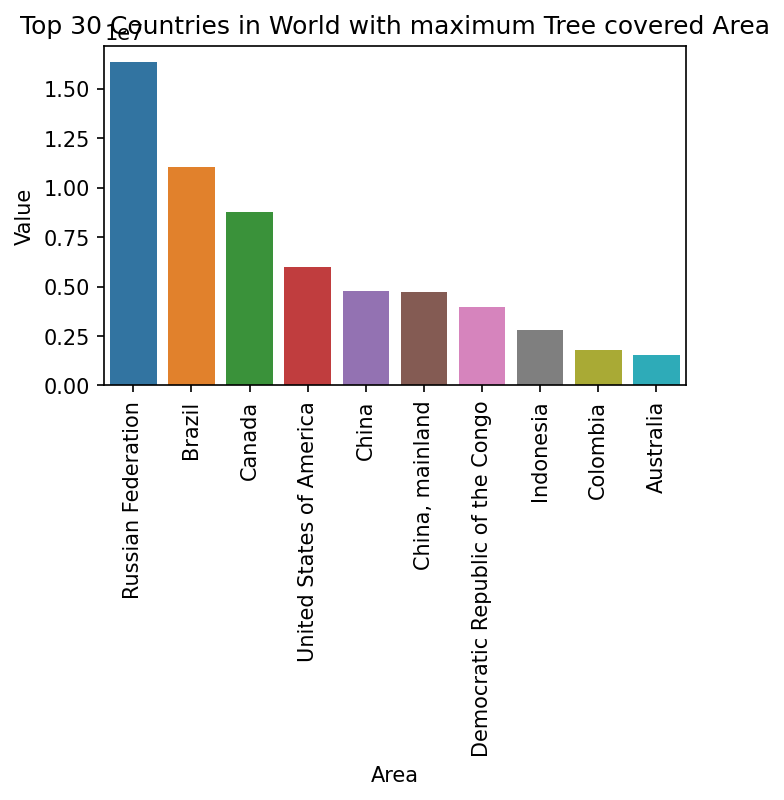

In [101]:
s=Tree.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(10)
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
pl=sns.barplot(x=s.index,y='Value',data=s).set(title='Top 30 Countries in World with maximum Tree covered Area')
plt.xticks(rotation=90)

## Q 2: Top 5 countries in world with snow and glaciers

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Antarctica'),
  Text(1, 0, 'Greenland'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Russian Federation'),
  Text(4, 0, 'United States of America')])

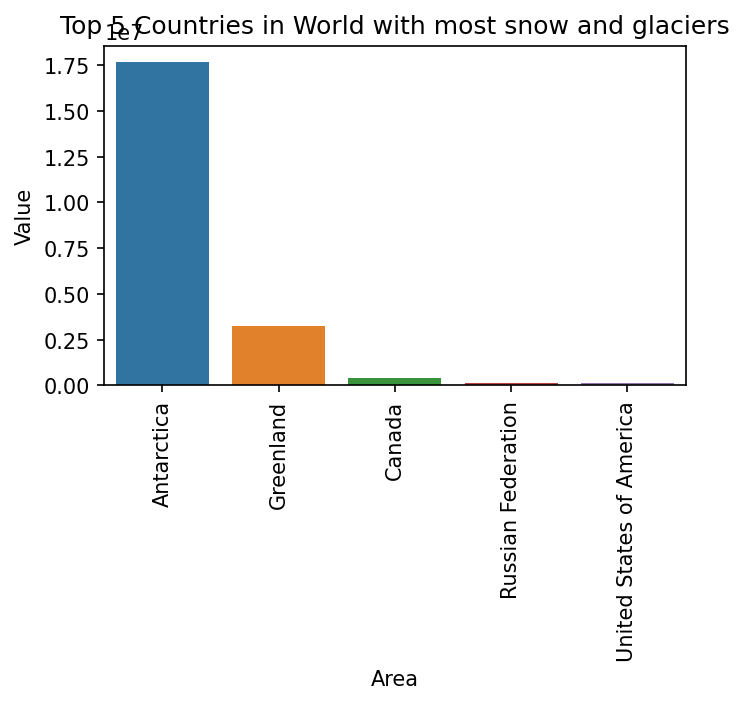

In [102]:
s=snow.groupby(["Area"]).sum().sort_values(by="Value", ascending=False).head(5)
plt.figure(figsize=(5,3), dpi=150, linewidth=2)
pl=sns.barplot(x=s.index,y='Value',data=s).set(title='Top 5 Countries in World with most snow and glaciers')
plt.xticks(rotation=90)

**Q3:Top 10 countries in world with most Terrestrial barren land**

In [103]:
s=terrestrial.groupby(["Area"]).sum().sort_values(by="Value", ascending=True).head(10)
s
# plt.figure(figsize=(5,3), dpi=150, linewidth=2)
# pl=sns.barplot(x=s.index,y='Value',data=s,capsize=.2).set(title='Top 10 Countries in World with most Terrestrial barren land')
# plt.xticks(rotation=90)

,Item Code,Year,Value
Area,,,
Norfolk Island,125622,36171,0.0
Luxembourg,125622,36171,0.0
Tonga,125622,36171,0.0
Liechtenstein,125622,36171,0.0
Dominica,125622,36171,0.0
Latvia,125622,36171,0.0
Johnston Island,125622,36171,0.0
Cayman Islands,125622,36171,0.0
Saint Kitts and Nevis,125622,36171,0.0


**Q3:Top 10 countries in world with most Artificical Surfaces**

In [104]:
s=Artif.groupby(["Area"]).sum().sort_values(by="Value", ascending=True).head(10)
s
# plt.figure(figsize=(5,3), dpi=150, linewidth=2)
# pl=sns.barplot(x=s.index,y='Value',data=s,capsize=.2).set(title='Top 10 Countries in World with most Artificical Surfaces')
# plt.xticks(rotation=90)

,Item Code,Year,Value
Area,,,
Maldives,125460,36171,0.0
Channel Islands,125460,36171,0.0
"China, Macao SAR",125460,36171,0.0
South Georgia and the South Sandwich Islands,125460,36171,0.0
Comoros,125460,36171,0.0
Marshall Islands,125460,36171,0.0
Cook Islands,125460,36171,0.0
Malta,125460,36171,0.0
Seychelles,125460,36171,0.0


**Q4: Top 10 Countries By continnet by Land covered areas in world**

In [105]:
s=df.groupby(["Area",'continent']).sum().sort_values(by="Value", ascending=False).head(10)
s

,,Item Code,Year,Value
Area,continent,,,
Russian Federation,Europe,1255788,361710,3.049668e+07
China,Asia,1758078,506394,2.364251e+07
Antarctica,Antarctica,1255788,361710,1.862822e+07
Canada,North America,1255788,361710,1.769419e+07
"China, mainland",Asia,1255788,361710,1.682021e+07
United States of America,North America,1255788,361710,1.678353e+07
Brazil,South America,1255788,361710,1.526569e+07
Australia,Oceania,1255788,361710,1.389427e+07
India,Asia,1255788,361710,5.354307e+06


### Q5: Maximum Area planted in a Year

In [106]:
c=df.groupby(["Year","Area"]).sum().sort_values(by="Value", ascending=False).head(30)
c

,,Item Code,Value
Year,Area,,
2011,Russian Federation,69766,1.694261e+06
2010,Russian Federation,69766,1.694261e+06
2018,Russian Federation,69766,1.694261e+06
2006,Russian Federation,69766,1.694261e+06
2016,Russian Federation,69766,1.694260e+06
2015,Russian Federation,69766,1.694260e+06
2012,Russian Federation,69766,1.694260e+06
2002,Russian Federation,69766,1.694260e+06
2007,Russian Federation,69766,1.694260e+06


In [107]:
df_a.head()

,Area Code (ISO3),Area,Item Code,Item,Year,Value,continent
0,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2001,88.1603,Asia
1,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2002,88.1818,Asia
2,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2003,88.2247,Asia
3,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2004,88.2462,Asia
4,AFG,Afghanistan,6970,Artificial surfaces (including urban and assoc...,2005,88.3106,Asia


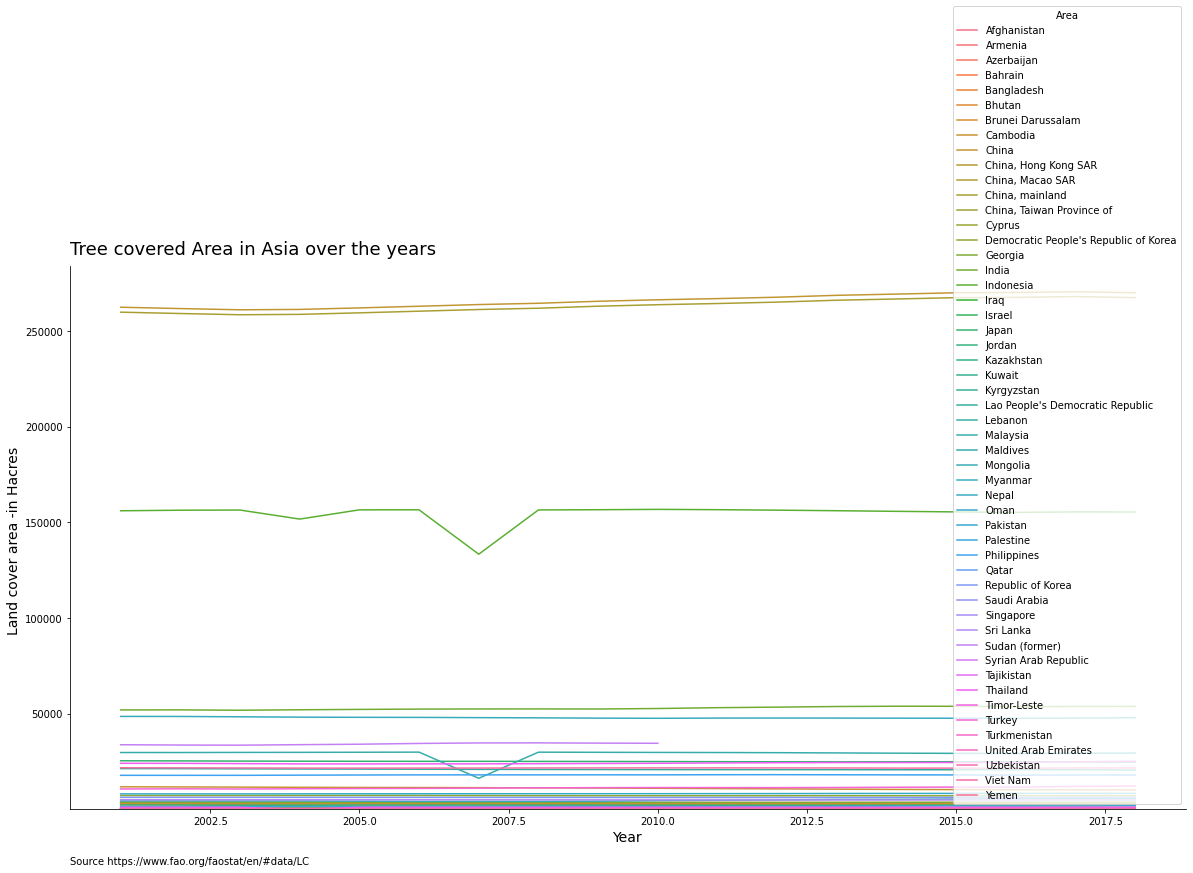

In [108]:
#visualization of Tree covered Area in Asia over the years 
plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_a[df_a['Item']=='Tree-covered areas'],hue="Area")

#customisation
plt.annotate('Source https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
plt.ylim(10,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Tree covered Area in Asia over the years ", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land cover area -in Hacres ", fontsize=14)

plt.show()

## Data Insight to Subcontinent

In [109]:
# Selecting Subcontinents countries
df_sub = df[df["Area"].isin(["India", "Pakistan", 'Bangladesh'])]
df_sub.head()

,Area Code (ISO3),Area,Item Code,Item,Year,Value,continent
4284,BGD,Bangladesh,6970,Artificial surfaces (including urban and assoc...,2001,97.5194,Asia
4285,BGD,Bangladesh,6970,Artificial surfaces (including urban and assoc...,2002,97.6053,Asia
4286,BGD,Bangladesh,6970,Artificial surfaces (including urban and assoc...,2003,98.0132,Asia
4287,BGD,Bangladesh,6970,Artificial surfaces (including urban and assoc...,2004,98.6142,Asia
4288,BGD,Bangladesh,6970,Artificial surfaces (including urban and assoc...,2005,98.6786,Asia


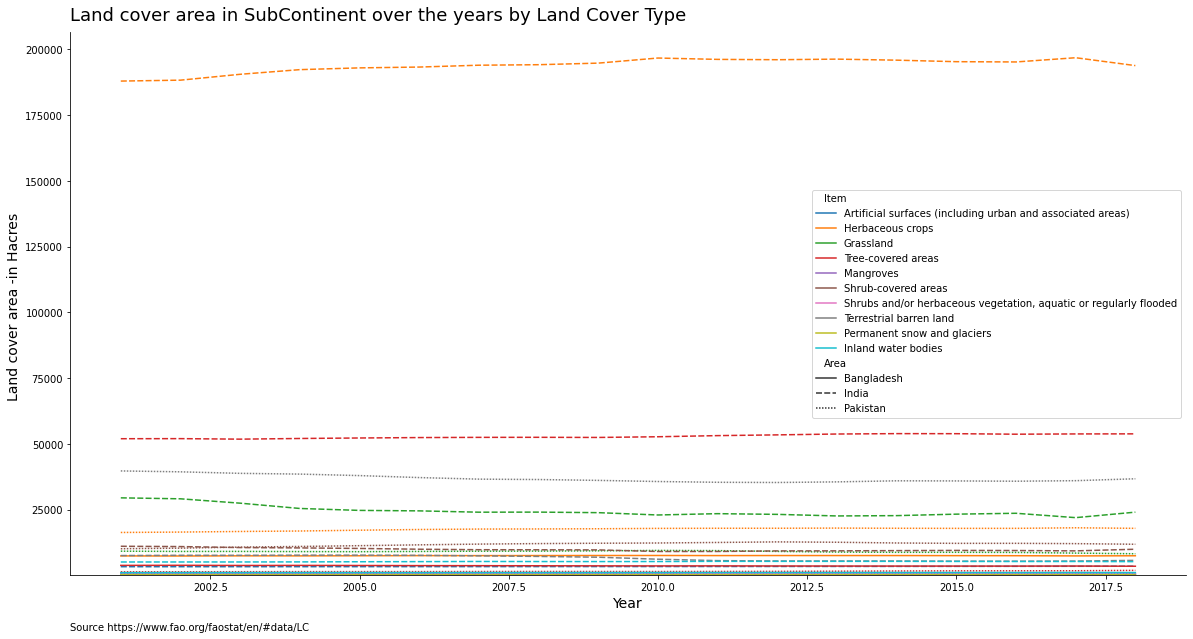

In [110]:
# visualization of Land cover in Sub Continentthe years by type of Land Cover
from turtle import color


plt.figure(figsize = (20,10))
sns.lineplot(x = "Year", y = "Value", data = df_sub,hue="Item",style="Area")

#customisation
plt.annotate('Source https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
plt.ylim(10,)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Land cover area in SubContinent over the years by Land Cover Type", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land cover area -in Hacres ", fontsize=14)

plt.show()

# Each country individual comparison by Land Cover

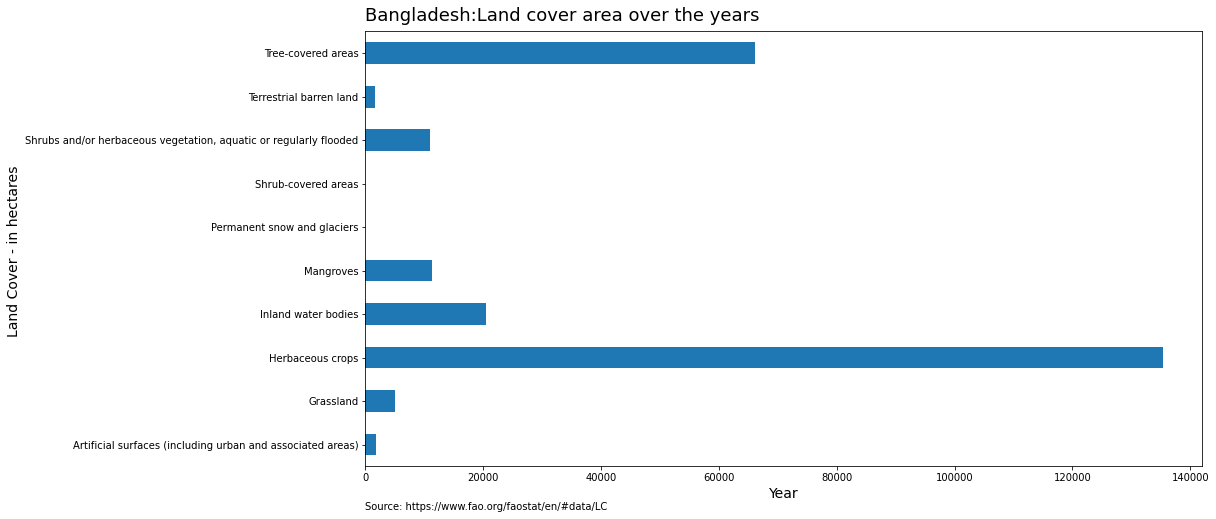

In [111]:
# Groupby Bangladesh and Item and plot the mean in horizontal bar chart
df_sub[df_sub["Area"]=="Bangladesh"].groupby("Item")["Value"].sum().plot(kind="barh", figsize=(15,8))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
plt.title("Bangladesh:Land cover area over the years", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land Cover - in hectares ", fontsize=14)
plt.show()
# # visualization of Land cover in Sub Continentthe years by type of Land Cover
# from turtle import color


# plt.figure(figsize = (20,10))
# sns.lineplot(x = "Year", y = "Value", data = df_sub[df_sub["Area"]=="Bangladesh"])

# #customisation
# plt.annotate('Source https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
# plt.ylim(10,)
# sns.despine(top = True, right = True, left = False, bottom = False)
# plt.title("Bangladesh:Land cover area over the years ", fontsize = 18, loc='left', y=1.01 )
# plt.xlabel("Year", fontsize=14)
# plt.ylabel("Land cover area -in Hacres ", fontsize=14)

# plt.show()

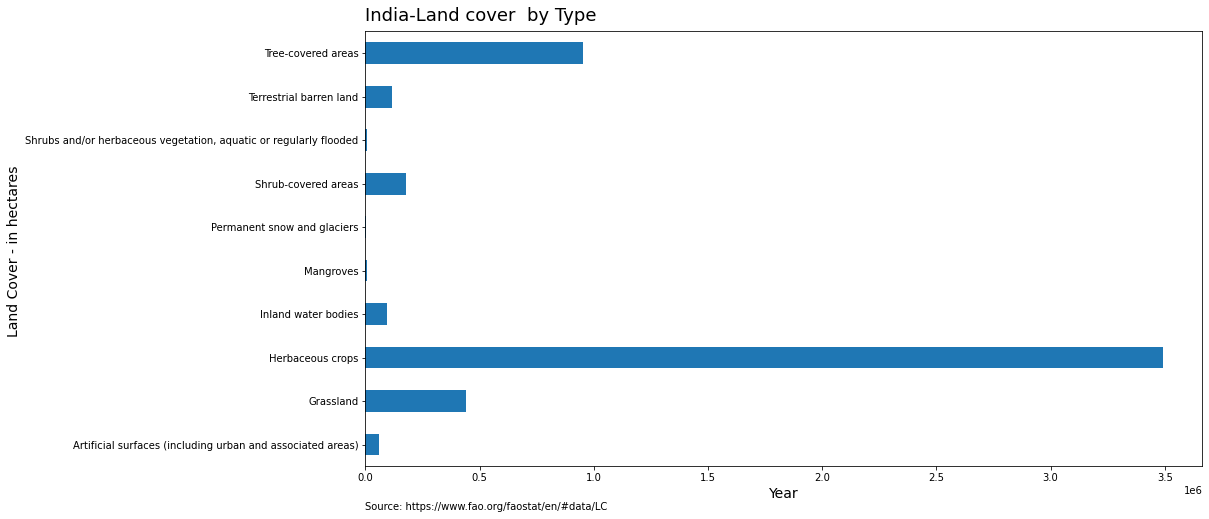

In [112]:
 #Groupby India-Land Cover by bar chart

df_sub[df_sub["Area"]=="India"].groupby("Item")["Value"].sum().plot(kind="barh", figsize=(15,8))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/LC', (0,-.1), xycoords ='axes fraction' )
plt.title("India-Land cover  by Type", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land Cover - in hectares ", fontsize=14)
plt.show()

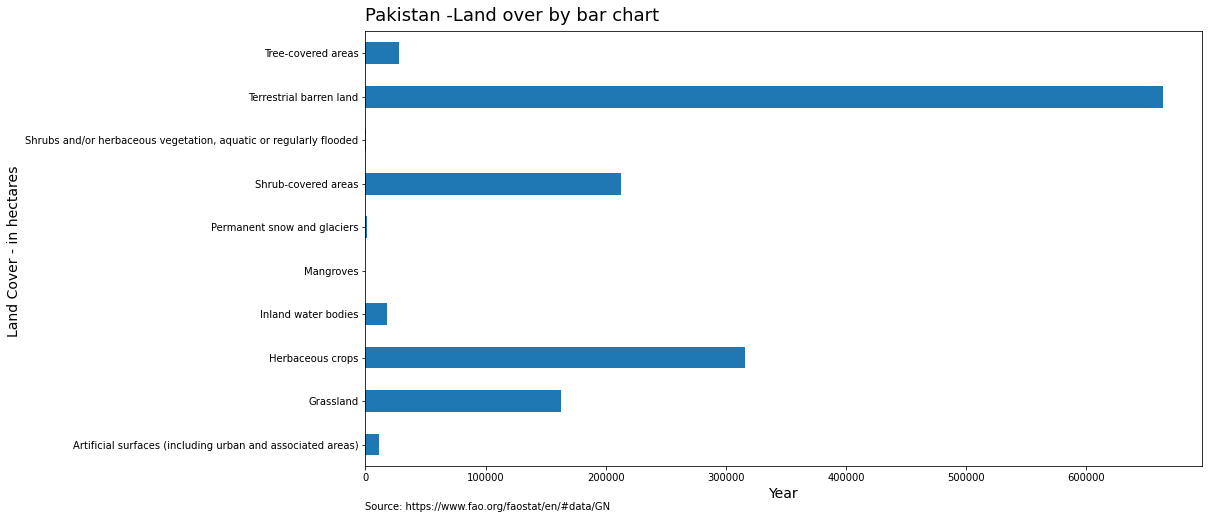

In [113]:
# Groupby Pakistan -Land over by bar chart
 
df_sub[df_sub["Area"]=="Pakistan"].groupby("Item")["Value"].sum().plot(kind="barh", figsize=(15,8))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Pakistan -Land over by bar chart", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land Cover - in hectares ", fontsize=14)
plt.show()

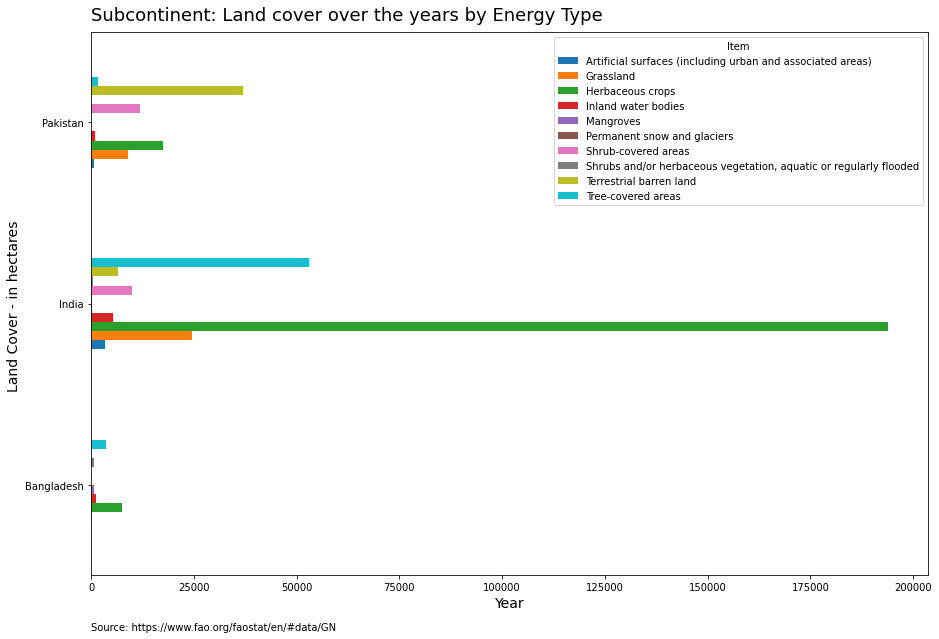

In [114]:
# Comparison of Land over by bar chart between subcontinents countries
df_sub.groupby(['Area', 'Item'])['Value'].mean().unstack().plot(kind='barh', figsize=(15, 10))

#customisation
plt.annotate('Source: https://www.fao.org/faostat/en/#data/GN', (0,-.1), xycoords ='axes fraction' )
plt.title("Subcontinent: Land cover over the years by Energy Type", fontsize = 18, loc='left', y=1.01 )
plt.xlabel("Year", fontsize=14)
plt.ylabel("Land Cover - in hectares ", fontsize=14)
plt.show()